In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
ins_df=pd.read_csv("insurance_data.csv")

In [4]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
print('Age \n',ins_df.Age.value_counts())
print('\n')
print('Agency_Code \n',ins_df.Agency_Code.value_counts())
print('\n')
print('Type \n',ins_df.Type.value_counts())
print('\n')
print('Claimed \n',ins_df.Claimed.value_counts())
print('\n')
print('Commision \n',ins_df.Commision.value_counts())
print('\n')
print('Channel \n',ins_df.Channel.value_counts())
print('\n')
print('Duration \n',ins_df.Duration.value_counts())
print('\n')
print('Sales \n',ins_df.Sales.value_counts())
print('\n')
print('Product Name \n',ins_df["Product Name"].value_counts())
print('\n')
print('Destination \n',ins_df.Destination.value_counts())

Age 
 36    999
31    125
48    108
30     96
35     94
     ... 
8       1
84      1
83      1
15      1
11      1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Commision 
 0.00     1366
63.21      62
23.76      61
54.00      61
17.82      57
         ... 
49.40       1
68.08       1
15.56       1
1.25        1
13.50       1
Name: Commision, Length: 324, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Duration 
 8      83
5      82
10     81
6      81
11     81
       ..
393     1
244     1
208     1
431     1
416     1
Name: Duration, Length: 257, dtype: int64


Sales 
 20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
171.00      1
159.00      1
177.00      1
1.99        1
287.40      

In [7]:
ins_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [8]:
ins_df.shape

(3000, 10)

In [9]:
# Get the proportions
print(ins_df.Claimed.value_counts(normalize=True))
print('%0s',ins_df.Claimed.value_counts()[0],'\n','%1s',ins_df.Claimed.value_counts()[1])

No     0.692
Yes    0.308
Name: Claimed, dtype: float64
%0s 2076 
 %1s 924


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins_df[feature].unique()))
        print(pd.Categorical(ins_df[feature].unique()).codes)
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [12]:
print('Age \n',ins_df.Age.value_counts())
print('\n')
print('Agency_Code \n',ins_df.Agency_Code.value_counts())
print('\n')
print('Type \n',ins_df.Type.value_counts())
print('\n')
print('Claimed \n',ins_df.Claimed.value_counts())
print('\n')
print('Commision \n',ins_df.Commision.value_counts())
print('\n')
print('Channel \n',ins_df.Channel.value_counts())
print('\n')
print('Duration \n',ins_df.Duration.value_counts())
print('\n')
print('Sales \n',ins_df.Sales.value_counts())
print('\n')
print('Product Name \n',ins_df["Product Name"].value_counts())
print('\n')
print('Destination \n',ins_df.Destination.value_counts())

Age 
 36    999
31    125
48    108
30     96
35     94
     ... 
8       1
84      1
83      1
15      1
11      1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Commision 
 0.00     1366
63.21      62
23.76      61
54.00      61
17.82      57
         ... 
49.40       1
68.08       1
15.56       1
1.25        1
13.50       1
Name: Commision, Length: 324, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Duration 
 8      83
5      82
10     81
6      81
11     81
       ..
393     1
244     1
208     1
431     1
416     1
Name: Duration, Length: 257, dtype: int64


Sales 
 20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
171.00      1
159.00      1
177.00      1
1.99        1
287.40      1
Name: Sales, Length: 380, dtype: int64


Produ

In [13]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [14]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [15]:
ld_df = ins_df

In [16]:
X = ld_df.drop("Claimed", axis=1)

y = ld_df.pop("Claimed") 

X.head()


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=.30, random_state=1)


In [18]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)


print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
Total Obs 3000


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [21]:
#Scale the training data
x_train = sc.fit_transform(X_train)

In [22]:
x_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [23]:
# Apply the transformation on the test data
x_test = sc.transform(X_test)

In [24]:
x_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

In [25]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  
                    random_state=1,tol=0.01)

In [26]:
# Fit the model on the training data
clf.fit(x_train, y_train)

Iteration 1, loss = 0.73190828
Iteration 2, loss = 0.70481842
Iteration 3, loss = 0.67377712
Iteration 4, loss = 0.64619472
Iteration 5, loss = 0.62272023
Iteration 6, loss = 0.60330223
Iteration 7, loss = 0.58732612
Iteration 8, loss = 0.57422402
Iteration 9, loss = 0.56310704
Iteration 10, loss = 0.55382327
Iteration 11, loss = 0.54599574
Iteration 12, loss = 0.53911673
Iteration 13, loss = 0.53335898
Iteration 14, loss = 0.52839899
Iteration 15, loss = 0.52391237
Iteration 16, loss = 0.51999360
Iteration 17, loss = 0.51649432
Iteration 18, loss = 0.51346008
Iteration 19, loss = 0.51074817
Iteration 20, loss = 0.50822930
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

In [27]:
# use the model to predict the training data
y_pred1 = clf.predict(x_train)

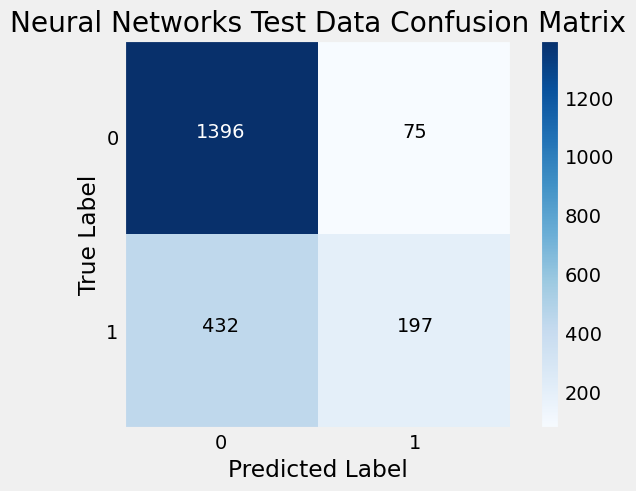

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# generate the confusion matrix
cm = confusion_matrix(y_train, y_pred1)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Neural Networks Test Data Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# add the values of the cells to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.grid(b=False, which='both')
plt.show()


In [29]:
clf.score(x_train,y_train)

0.7585714285714286

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1471
           1       0.72      0.31      0.44       629

    accuracy                           0.76      2100
   macro avg       0.74      0.63      0.64      2100
weighted avg       0.75      0.76      0.72      2100



AUC: 0.792


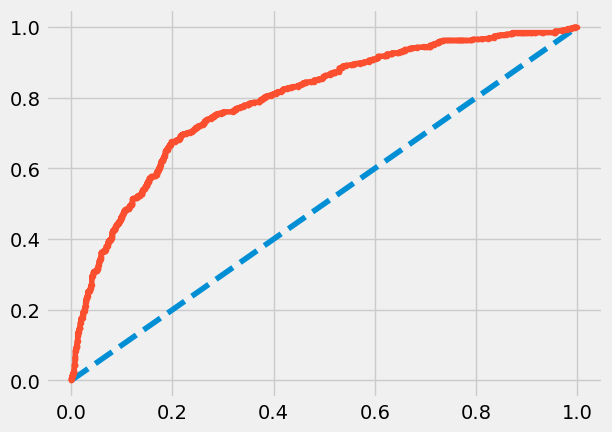

In [32]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [33]:
y_pred = clf.predict(x_test)

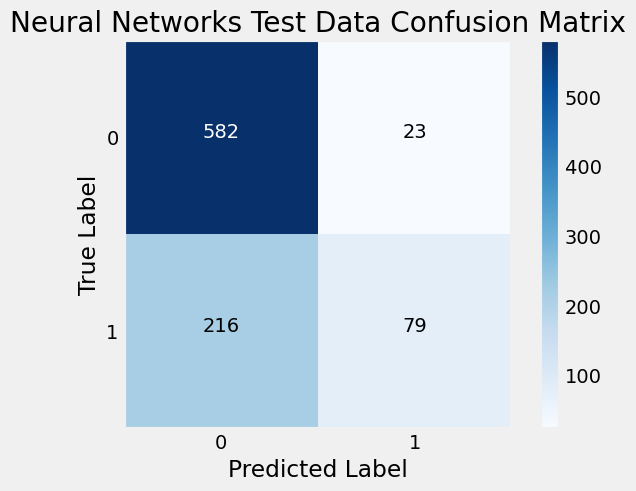

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Neural Networks Test Data Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# add the values of the cells to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.grid(b=False, which='both')
plt.show()


In [35]:
clf.score(x_test,y_test)

0.7344444444444445

In [36]:
print("Classification report for Train Dataset for Initial modal","\n",classification_report(y_train, y_pred1))

print("Classification report for Test Dataset for Initial modal","\n",classification_report(y_test, y_pred))

Classification report for Train Dataset for Initial modal 
               precision    recall  f1-score   support

           0       0.76      0.95      0.85      1471
           1       0.72      0.31      0.44       629

    accuracy                           0.76      2100
   macro avg       0.74      0.63      0.64      2100
weighted avg       0.75      0.76      0.72      2100

Classification report for Test Dataset for Initial modal 
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       605
           1       0.77      0.27      0.40       295

    accuracy                           0.73       900
   macro avg       0.75      0.61      0.61       900
weighted avg       0.74      0.73      0.69       900



AUC: 0.767


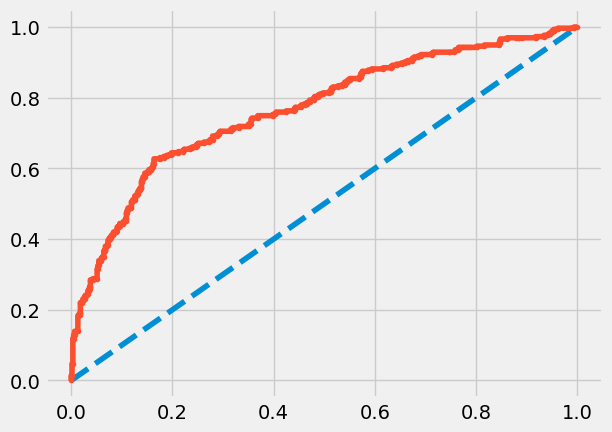

In [37]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [50,100,200,300,500],
    'max_iter': [500,750,1000,3000],
    'solver': ['sgd','adam'],
    'tol': [0.001],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid =param_grid, cv = 10)

In [39]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200, 300, 500],
                         'max_iter': [500, 750, 1000, 3000],
                         'solver': ['sgd', 'adam'], 'tol': [0.001]})

In [40]:
grid_search.best_params_

{'hidden_layer_sizes': 300, 'max_iter': 500, 'solver': 'adam', 'tol': 0.001}

In [41]:
best_grid = grid_search.best_estimator_

In [42]:
best_grid

MLPClassifier(hidden_layer_sizes=300, max_iter=500, random_state=1, tol=0.001)

In [43]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# generate the confusion matrix
cm = confusion_matrix(x_train, y_train)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Neural Networks Test Data Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# add the values of the cells to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.grid(b=False, which='both')
plt.show()


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [43]:
confusion_matrix(y_train,ytrain_predict) # alternate method to print CM

array([[1302,  169],
       [ 278,  351]], dtype=int64)

In [44]:
best_grid.score(x_train,y_train)

0.7871428571428571

In [45]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.68      0.56      0.61       629

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100



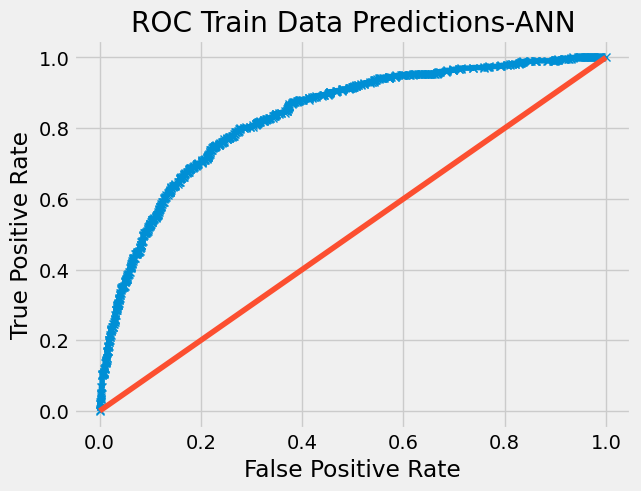

Area under Curve is 0.8322431881235415


In [46]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Train Data Predictions-ANN')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,
                                           best_grid.predict_proba(x_train)[:,1]))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# generate the confusion matrix
cm = confusion_matrix(x_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Neural Networks Test Data Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# add the values of the cells to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.grid(b=False, which='both')
plt.show()


NameError: name 'x_test' is not defined

In [48]:
best_grid.score(x_test,y_test)

0.7655555555555555

In [49]:
print("A--Classification report for Train Dataset for Hypertuned modal","\n",classification_report(y_train,ytrain_predict))
print("B--Classification report for Test Dataset for Hypertuned modal","\n",classification_report(y_test,ytest_predict))

A--Classification report for Train Dataset for Hypertuned modal 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.68      0.56      0.61       629

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100

B--Classification report for Test Dataset for Hypertuned modal 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.46      0.56       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



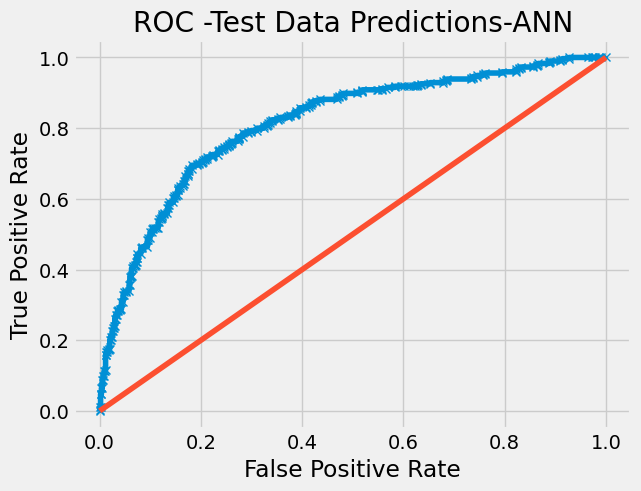

Area under Curve is 0.8134668721109399


In [50]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -Test Data Predictions-ANN')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1]))